1.	В качестве данных загрузить набор IMDb movie review из keras

In [54]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Flatten, LSTM, GRU

import matplotlib.pyplot as plt


In [55]:
max_words = 10000
maxlen = 100

In [56]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)
dictionary = imdb.get_word_index()

2.	Далее необходимо все тексты привести к одной размерности. Для этого необходимо использовать функцию pad_sequences, где указывается финальная размерность с помощью параметра maxlen. Параметр padding показывает, куда добавлять 0, если длина исходного текста была меньше maxlen.

In [57]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (25000, 100)
Shape of x_test: (25000, 100)


3.	Создать модель типа Sequential, куда будут добавляться слои. Далее добавить Dense слои, в конце обязательно должен быть Dense слой с одним нейроном (так как задача бинарной классификации и на выходе будет значение 0 или 1, в качестве функции активации лучше использовать сигмоидальную функцию, так как она лучше всего подходит к этой задаче). Количество скрытых слоев и их параметры задайте самостоятельно.
4.	Настройте модель с помощью метода compile. В качестве функции потерь используйте binary_crossentropy, а в качестве метрики accuracy. 

In [59]:
vocab_size = max_words
embedding_dim = 16

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

5.	Далее обучите модель на тренировочных данных и постройте графики обучения модели на разных эпохах:

```plt.plot(history.history['accuracy'], label = 'Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()```
Где history – это результат работы метода fit модели (history = model.fit(…))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6607 - loss: 0.5784 - val_accuracy: 0.8476 - val_loss: 0.3506
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9270 - loss: 0.2001 - val_accuracy: 0.8194 - val_loss: 0.4520
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.8104 - val_loss: 0.7105
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0089 - val_accuracy: 0.8082 - val_loss: 0.9741
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.8086 - val_loss: 1.1910
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.8082 - val_loss: 1.1629
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.8140 - val_loss: 0.8950
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.

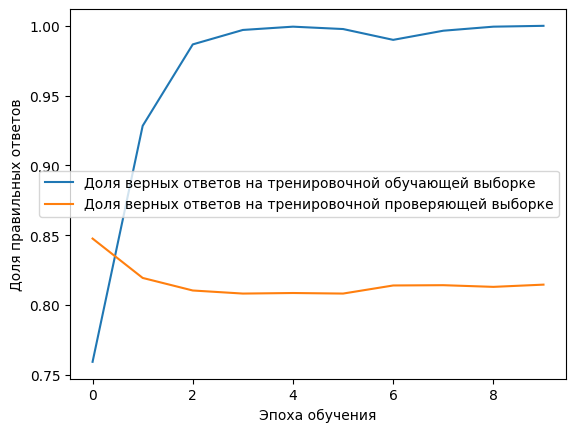

In [60]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()


6.	Проверьте полученную модель на тестовых данных. Объясните результаты.

In [61]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8038 - loss: 1.4024
Test Loss: 1.379717230796814
Test Accuracy: 0.8077200055122375


7.	Теперь для тех же данных постройте другую модель. В нее необходимо включить слой Embedding (его параметры: кол-во слов (max_words), длина вектора слова (итоговая), длина входных векторов текстов (maxlen), например, Embedding(max_words,2,input_length=maxlen)), слой SimpleRNN (с кол-вом нейронов в нем) и Dense (последний, такой же, как и в первой части). Точно также настроить модель, обучить ее и построить графики обучения.

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6084 - loss: 0.6428 - val_accuracy: 0.8080 - val_loss: 0.4397
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8263 - loss: 0.4005 - val_accuracy: 0.6714 - val_loss: 0.5966
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8442 - loss: 0.3687 - val_accuracy: 0.8130 - val_loss: 0.4441
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9035 - loss: 0.2593 - val_accuracy: 0.8188 - val_loss: 0.4577
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9379 - loss: 0.1815 - val_accuracy: 0.8124 - val_loss: 0.5157
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9557 - loss: 0.1338 - val_accuracy: 0.8064 - val_loss: 0.5767
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9362 - loss: 0.2131 - val_accuracy: 0.8056 - val_loss: 0.5933
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9649 - loss: 0.1129 - val_accuracy: 0.

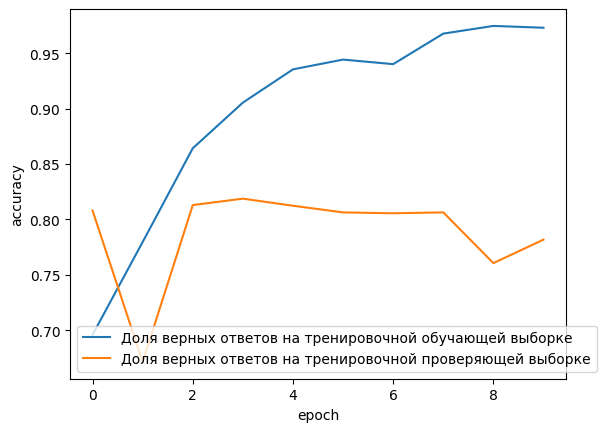

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7846 - loss: 0.7092
Test Loss: 0.7024805545806885
Test Accuracy: 0.7841200232505798


In [62]:

model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

8.	Постройте разные вариации модели (измените параметры при загрузке данных (max_words, maxlen) и параметры слоев модели. Сравните результаты.

{'max_words': 5000, 'maxlen': 50, 'embedding_dim': 8, 'rnn_units': 16}
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6230 - loss: 0.6261 - val_accuracy: 0.7848 - val_loss: 0.4681
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8387 - loss: 0.3794 - val_accuracy: 0.7964 - val_loss: 0.4524
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8762 - loss: 0.3023 - val_accuracy: 0.7858 - val_loss: 0.4667
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9054 - loss: 0.2430 - val_accuracy: 0.7772 - val_loss: 0.5237
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9361 - loss: 0.1842 - val_accuracy: 0.7700 - val_loss: 0.5920
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9639 - loss: 0.1175 - val_accuracy: 0.7600 - val_loss: 0.6680
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0802 - val_accuracy: 0.7640 - val_loss: 0.8083
Epoch 8/10
625/625 ━━━━━━━━━━━━━━

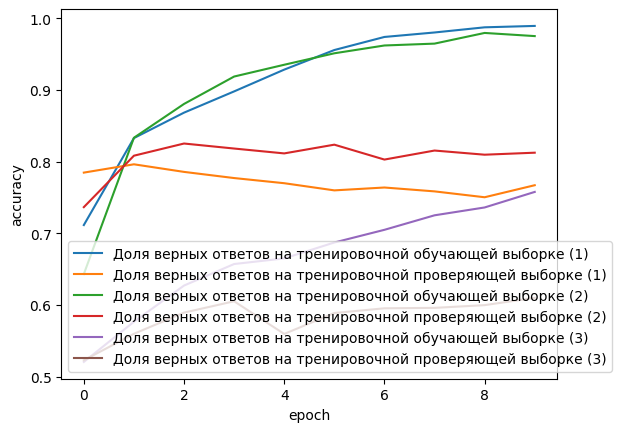

In [63]:
variations = [
    {'max_words': 5000, 'maxlen': 50, 'embedding_dim': 8, 'rnn_units': 16},
    {'max_words': 10000, 'maxlen': 100, 'embedding_dim': 16, 'rnn_units': 32},
    {'max_words': 20000, 'maxlen': 200, 'embedding_dim': 32, 'rnn_units': 64}
    
]

for i, params in enumerate(variations):
    print(params)

    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=params['max_words'])

    x_train = pad_sequences(x_train, maxlen=params['maxlen'], padding='post')
    x_test = pad_sequences(x_test, maxlen=params['maxlen'], padding='post')

    model = Sequential()
    model.add(Embedding(input_dim=params['max_words'], output_dim=params['embedding_dim'], input_length=params['maxlen']))
    model.add(SimpleRNN(params['rnn_units']))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    plt.plot(history.history['accuracy'], label=f'Доля верных ответов на тренировочной обучающей выборке ({i+1})')
    plt.plot(history.history['val_accuracy'], label=f'Доля верных ответов на тренировочной проверяющей выборке ({i+1})')

    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Test Loss ({i+1}): {loss}')
    print(f'Test Accuracy ({i+1}): {accuracy}')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [64]:

embedding_dim = 16
rnn_units = 32


model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model_lstm.add(LSTM(rnn_units))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model_gru.add(GRU(rnn_units))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gru = model_gru.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history_lstm.history['accuracy'], label='Тренировочная точность (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Валидационная точность (LSTM)')
plt.plot(history_gru.history['accuracy'], label='Тренировочная точность (GRU)')
plt.plot(history_gru.history['val_accuracy'], label='Валидационная точность (GRU)')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test, y_test)
print(f'Test Loss (LSTM): {loss_lstm}')
print(f'Test Accuracy (LSTM): {accuracy_lstm}')

loss_gru, accuracy_gru = model_gru.evaluate(x_test, y_test)
print(f'Test Loss (GRU): {loss_gru}')
print(f'Test Accuracy (GRU): {accuracy_gru}')


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sequential_29_1/embedding_29_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\nikita\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\nikita\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\nikita\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\nikita\AppData\Local\Temp\ipykernel_15868\2189208364.py", line 11, in <module>

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\layers\core\embedding.py", line 140, in call

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\ops\numpy.py", line 5206, in take

  File "c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2029, in take

indices[19,9] = 10337 is not in [0, 10000)
	 [[{{node sequential_29_1/embedding_29_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_713032]